In [41]:
'''
This is an open-book exam.
You can use Internet but you are not allowed to use any AI Tools
You are not allowed to use Our Lab's Lectures code or assignments or Kaggle
You are not allowed to use any social media website or application
You are Not allowed to share any part of code with others during the exam
You are not allowed to use any prepeard code
You are not allowed to use Github except for download weights
If you use any AI Tools you will get 0 out of 30.
The exam consists of (2) questions. Each question has its own weight in the evaluation.
Write your code after each question otherwise you will not get the marks for the question
The total grades for the exam are (30).
Read each question carefully before start writing the code
You have (75) minutes to complete the exam.
When you finish the Code, you must submit it on elearning.
I will discuss your answers with you, so you need to understand each line of code in your answer
Do not use any unneccery line of code
You Must add the link of the website that you get the code from it for each sub-question
It will be checked if the code is getting from the mentioned website ...
        you will get the question's marks otherwise it will be consider as an AI answer
When you finish the exam you are requiered to download the notebook and submit it on e-learning
Send the notebook to my email : a.hyassat@bau.edu.jo , but your name in the email subject

Make a copy of this notebook then rename it with your name
'''

"\nThis is an open-book exam.\nYou can use Internet but you are not allowed to use any AI Tools\nYou are not allowed to use Our Lab's Lectures code or assignments or Kaggle\nYou are not allowed to use any social media website or application\nYou are Not allowed to share any part of code with others during the exam\nYou are not allowed to use any prepeard code\nYou are not allowed to use Github except for download weights\nIf you use any AI Tools you will get 0 out of 30.\nThe exam consists of (2) questions. Each question has its own weight in the evaluation.\nWrite your code after each question otherwise you will not get the marks for the question\nThe total grades for the exam are (30).\nRead each question carefully before start writing the code\nYou have (75) minutes to complete the exam.\nWhen you finish the Code, you must submit it on elearning.\nI will discuss your answers with you, so you need to understand each line of code in your answer\nDo not use any unneccery line of code\n

In [42]:
## Write your name and Student ID
#Mahmoud ibrahem mahmoud abuawd
#32109303046

In [43]:
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np
import os
from plotnine import *
from plotnine import ggplot
import plotnine
import pandas as pd

In [44]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-08-05 12:27:41--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   115MB/s    in 0.6s    

2024-08-05 12:27:41 (115 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [45]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [46]:
## Question 1.1 (6 marks) Data Generator
## Use Imagedatagenerator to prepare your training and validation data
## Apply at least 4 techniques for Data Augmentation (rotate, fliping, shear , zoom and any other techniques)
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
TRAINING_DIR = "/content/tmp/cats_and_dogs_filtered/train"
# Experiment with your own parameters to reach 99.9% validation accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=False,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/content/tmp/cats_and_dogs_filtered/validation"

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [47]:
## Question 1.2 (5 marks) Prepare your pretrained model without using top layers
## Choose MobileNetV2, you must download the weigths and use it
#https://audhiaprilliant.medium.com/fixed-feature-extractor-as-the-transfer-learning-method-for-image-classification-using-mobilenet-b26376e25d49
from tensorflow.keras.applications import MobileNetV2

pre_trained_model = MobileNetV2(
                  input_shape=(150, 150, 3),
                  include_top = False,
                  weights = None
              )
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
#https://www.kaggle.com/datasets/antoreepjana/tf-keras-pretrained-model-weights
pre_trained_model.load_weights('/content/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_192_no_top.h5')




## Question 1.3 (2 Marks) Freeze the layers of the pretrained model
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
for layer in pre_trained_model.layers:
    layer.trainable = False



## Question 1.4 (1 mark) Print the model layers
##https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
pre_trained_model.summary()





Model: "mobilenetv2_1.00_150"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 75, 75, 32)     │            864 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 75, 75, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 75, 75, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 75, 75, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 75, 75, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 75, 75, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 75, 75, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 75, 75, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 75, 75, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 77, 77, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 38, 38, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [48]:
## Question 1.5 (6 marks) Build a "" Sequential Model "" using the pretrained model then add the necessary layers
# Flatten the output layer to 1 dimension
#https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4
from tensorflow.keras import layers
from tensorflow.keras import Model

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(1, activation='sigmoid')

model = tf.keras.models.Sequential([
    pre_trained_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])






In [50]:
import keras as keras
## Question 2.1 (4 marks) Build callbacks,
## 1- Use Early Stopping
## 2- Save the best model in each epoch accourding to validation accuracy
#https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5)

In [51]:
## Question 2.2 (3 marks) Training you model using callback
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=5,
            verbose=1,callbacks =[es] )




Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.7087 - loss: 0.9457 - val_accuracy: 0.9550 - val_loss: 0.1471
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.9016 - loss: 0.3104 - val_accuracy: 0.9550 - val_loss: 0.1290
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 132s 4s/step - accuracy: 0.9250 - loss: 0.1867 - val_accuracy: 0.9410 - val_loss: 0.1675
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.9376 - loss: 0.1795 - val_accuracy: 0.9660 - val_loss: 0.1124
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.9400 - loss: 0.1826 - val_accuracy: 0.9550 - val_loss: 0.1404


<Figure size 640x480 with 0 Axes>

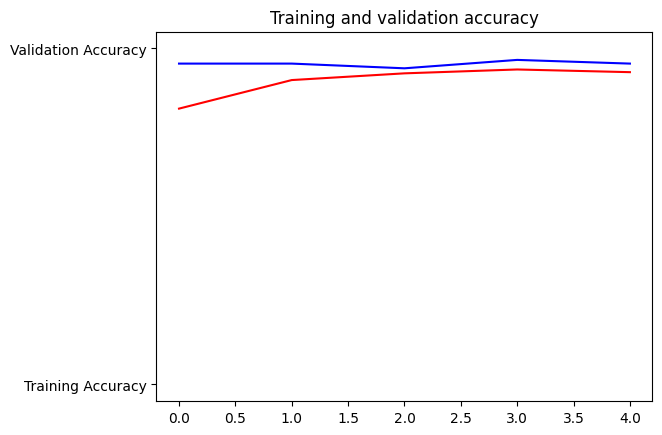

<Figure size 640x480 with 0 Axes>

In [55]:
## Question 2.3 (3 marks) Plot the accuracy of the training and validation
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()





